# 4.2 Other Unsupervised Learning Techniques

## Objectives:
1. Understand unsupervised learning techniques beyond clustering.
2. Learn about dimensionality reduction methods such as PCA.
3. Explore anomaly detection techniques.
4. Hands-on: Apply Principal Component Analysis (PCA) to a dataset.

By the end of this session, you will have a deeper understanding of unsupervised learning methods and their applications.


## 🌟 Dimensionality Reduction

### What is Dimensionality Reduction?
Dimensionality reduction reduces the number of input features while retaining the essential patterns in the data. It is useful for:
- Simplifying datasets.
- Visualizing high-dimensional data.
- Speeding up computations.

---

### Principal Component Analysis (PCA)
PCA is one of the most popular dimensionality reduction techniques.

---

### Key Steps:
1. Standardize the dataset (mean = 0, variance = 1).
2. Compute the covariance matrix.
3. Identify the principal components (eigenvectors of the covariance matrix).
4. Project the data onto the new subspace defined by the top principal components.

---

### Applications:
1. Image Compression.
2. Reducing features for faster model training.
3. Visualizing high-dimensional data (e.g., reducing 100 features to 2).

---

### Hands-On Example: PCA
We will implement PCA on a synthetic dataset later in this section.


### Hands-On: Dimensionality Reduction with PCA
Let's apply PCA to a dataset to reduce its dimensionality on a synthetic dataset.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

In [2]:
# 1. Generate Synthetic Data
X, y = make_classification(n_samples=200, n_features=10, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
# 2. Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

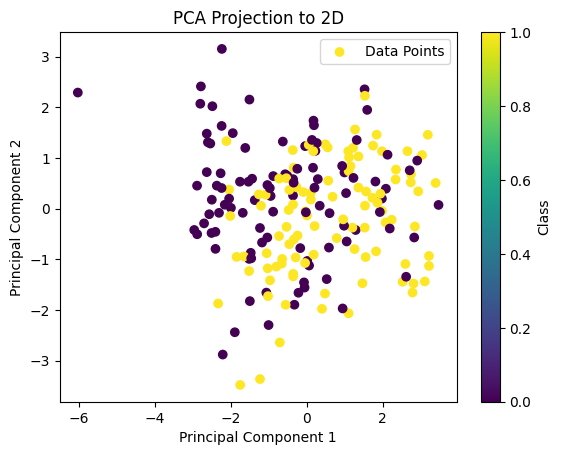

In [4]:
# 3. Visualize the Results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', label='Data Points')
plt.title('PCA Projection to 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.legend()
plt.show()

In [5]:
# 4. Explained Variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Each Component: {explained_variance}")
print(f"Total Explained Variance: {sum(explained_variance):.2f}")

Explained Variance by Each Component: [0.29171356 0.13093119]
Total Explained Variance: 0.42


**NOTE**: The explained variance ratio tells us how much information is preserved by each principal component. We can use this information to decide how many principal components to keep. 

In [7]:
# increase the number of components to 5
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Each Component: {explained_variance}")
print(f"Total Explained Variance: {sum(explained_variance):.2f}")

Explained Variance by Each Component: [0.29171356 0.13093119 0.12469358 0.10421315 0.09931451]
Total Explained Variance: 0.75


In [9]:
# increase the number of components to 10
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by Each Component: {explained_variance}")
print(f"Total Explained Variance: {sum(explained_variance):.2f}")

Explained Variance by Each Component: [0.29171356 0.13093119 0.12469358 0.10421315 0.09931451 0.08892574
 0.08776557]
Total Explained Variance: 0.93


## 🌟 Anomaly Detection

### What is Anomaly Detection?
Anomaly detection identifies data points that deviate significantly from the normal patterns. It is often used for:
- Fraud detection.
- Monitoring network traffic for intrusions.
- Detecting manufacturing defects.

---

### Techniques:
1. **Density-Based Methods**:
   - DBSCAN (clustering-based).
   - Isolation Forest (tree-based).
2. **Statistical Methods**:
   - Z-scores: Data points with high Z-scores (e.g., > 3) are anomalies.

---

### Applications:
1. Detecting fraudulent transactions in banking.
2. Identifying faulty sensors in IoT systems.
3. Finding outliers in customer behavior data.


### Hands-On: Anomaly Detection

We will implement anomaly detection using the Isolation Forest algorithm on a synthetic dataset. 

In [10]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs

In [11]:
# 1. Generate Synthetic Data
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=1.0, random_state=42)
outliers = np.random.uniform(low=-6, high=6, size=(20, 2))  # Add some outliers
X_with_outliers = np.vstack([X, outliers])

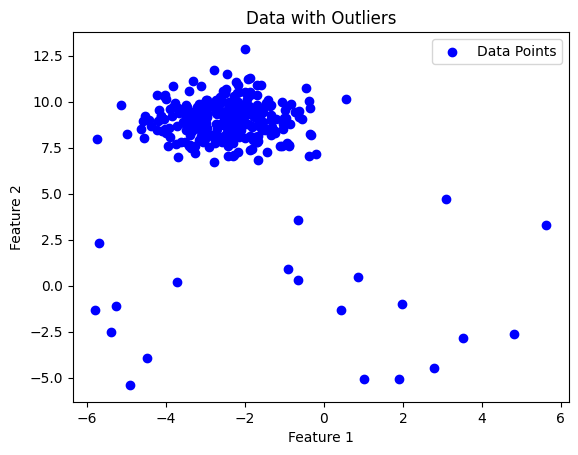

In [12]:
# Visualize the data with outliers
plt.scatter(X_with_outliers[:, 0], X_with_outliers[:, 1], color='blue', label='Data Points')
plt.title('Data with Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [13]:
# 2. Apply Isolation Forest for Anomaly Detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Assume 5% contamination
predictions = iso_forest.fit_predict(X_with_outliers)  # -1: Anomaly, 1: Normal

In [14]:
# Separate anomalies and normal points
normal = X_with_outliers[predictions == 1]
anomalies = X_with_outliers[predictions == -1]

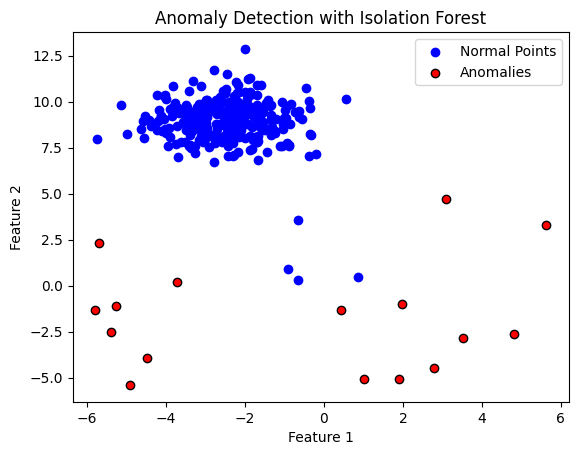

In [15]:
# Visualize Results
plt.scatter(normal[:, 0], normal[:, 1], color='blue', label='Normal Points')
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', label='Anomalies', edgecolor='k')
plt.title('Anomaly Detection with Isolation Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## 📝 Key Takeaways:
1. Dimensionality reduction techniques like PCA help simplify data while preserving patterns.
2. Anomaly detection is used to identify unusual data points in applications like fraud detection.
3. Each of these techniques has distinct use cases in real-world scenarios.